In [1]:
%matplotlib inline

import math
import random

import matplotlib.pyplot as plt
import numpy as np
import numba

In [28]:
def calculate_energy(lattice):
    """Calculate the energy of a lattice using the Ising model Hamiltonian."""
    energy = 0
    for y in range(L):
        for x in range(L):
            center = lattice[y][x]
            neighbours = [(y, (x-1)%L) ,(y, (x+1)%L), ((y-1)%L, x), ((y+1)%L, x)]
            for n in neighbours:
                if lattice[n] == center:
                    energy += J
        
    return energy

def exponents_init():
    exponents = {}
    for x in range(2, 5, 2):
        exponents[2*J*x] = math.exp(-beta * 2 * J * x)
    
    return exponents

def metropolis(sweeps):
    energy_history = []
    magnet_history = []
    exponents = exponents_init()
    
#     lattice = np.ones(L*L).reshape(L, L) # initial temperature is 0
    lattice = np.random.choice([-1, 1], L*L).reshape(L, L) # infinite initial temperature
    
    energy = calculate_energy(lattice) # calculate initial energy of the lattice
    for t in range(sweeps):
        # measurement every monte carlo timestep
        energy_history.append(energy) 
        magnet_history.append(np.sum(lattice))
        for k in range(L*L):

            rand_y, rand_x = random.randrange(L), random.randrange(L) # pick a random location on the lattice

            spin = lattice[rand_y, rand_x] # get the spin at that random location

            # determine the energy delta from flipping that spin
            neighbours = [(rand_y, (rand_x-1)%L), (rand_y, (rand_x+1)%L), ((rand_y-1)%L, rand_x), ((rand_y+1)%L, rand_x)]
            spin_sum = 0
            for n in neighbours:
                spin_sum += lattice[n]
            energy_delta = 2*J*spin*spin_sum
            
            
    
            if energy_delta <= 0:
                acceptance_probability = 1
            else:
                acceptance_probability = exponents[energy_delta]

            if random.random() <= acceptance_probability:
                lattice[rand_y, rand_x] = -1*spin
                energy += energy_delta

            
        if t % 100==0:
            print("sweep", t)

    return energy_history, magnet_history

sweep 0
sweep 100
sweep 200
sweep 300
sweep 400
sweep 500
sweep 600
sweep 700
sweep 800
sweep 900
[204, 152, 144, 104, 112, 108, 104, 100, 100, 100, 104, 92, 84, 72, 80, 104, 104, 84, 88, 112, 112, 84, 92, 76, 92, 84, 80, 76, 80, 84, 68, 72, 72, 68, 84, 100, 104, 88, 104, 108, 92, 96, 92, 80, 92, 76, 88, 80, 72, 72, 92, 104, 100, 100, 84, 76, 76, 84, 72, 88, 76, 80, 92, 80, 84, 92, 92, 96, 84, 92, 96, 84, 80, 80, 76, 108, 88, 76, 92, 104, 92, 88, 104, 92, 104, 96, 72, 76, 68, 76, 96, 84, 96, 104, 120, 112, 104, 96, 84, 68, 80, 44, 36, 36, 24, 32, 28, 36, 52, 48, 48, 32, 24, 16, 40, 40, 44, 32, 36, 44, 52, 48, 44, 40, 52, 56, 60, 40, 40, 56, 64, 60, 52, 48, 60, 32, 32, 36, 52, 60, 76, 44, 68, 60, 16, 48, 60, 64, 44, 24, 16, 8, 24, 16, 28, 48, 48, 48, 44, 32, 28, 44, 40, 28, 16, 40, 32, 28, 28, 24, 16, 36, 28, 40, 16, 32, 32, 24, 16, 24, 16, 16, 24, 8, 8, 8, 24, 32, 32, 24, 20, 24, 16, 24, 36, 16, 24, 20, 32, 28, 40, 24, 24, 28, 40, 16, 8, 8, 8, 32, 16, 24, 16, 28, 32, 32, 16, 24, 32, 20

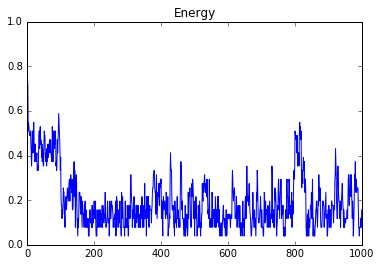

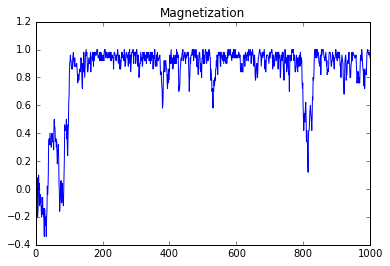

In [68]:
L = 10 # system size in one direction
J = 1 # lattice bond energy
temperature = 2 # temperature to simulate
beta = 1/temperature # inverse temperature, setting Boltzmann constant to 1

energy_history, magnet_history = metropolis(1000)

print(energy_history)
print(magnet_history)
sweeps = 1000
plt.title("Energy")
plt.plot(range(sweeps), [e/max(energy_history) for e in energy_history[:sweeps]])
plt.show()
plt.title("Magnetization")
plt.plot(range(sweeps), [m/max(magnet_history) for m in magnet_history[:sweeps]])
plt.show()

In [54]:
def auto_correlation(t, data):
    tmax = len(data)
    time_delta = data[1] - data[0]
    
    upper_bound = tmax-t
    first_sum = 0
    second_sum = 0
    third_sum = 0
    for n in range(upper_bound):
        first_sum += data[n]*data[n+t]
        second_sum += data[n]
        third_sum += data[n+t]
    
    correlation = (1/upper_bound)*(first_sum - (1/upper_bound)*second_sum*third_sum)

    return correlation



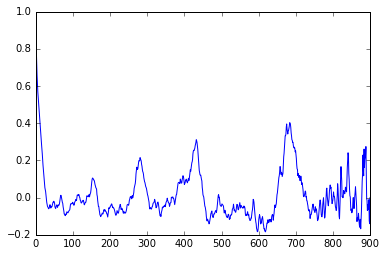

10.068186435


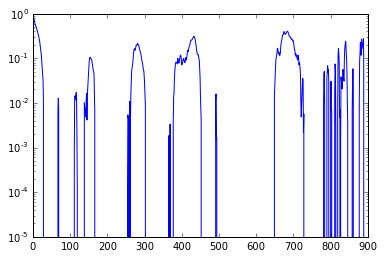

In [75]:
equilibrium = 100
data = np.asarray([auto_correlation(p, magnet_history[equilibrium:]) for p in range(1000-equilibrium)])
normalize = data / data.max()
plt.plot(range(len(data)), normalize)
plt.show()
correlation_time = np.trapz(normalize)
print(correlation_time)

plt.plot(range(len(data)), normalize)
plt.yscale("log")
plt.show()

In [86]:
magnet_samples = []
energy_samples = []

for t in range(equilibrium, 1000, math.ceil(correlation_time)):
    magnet_samples.append(magnet_history[t])
    energy_samples.append(energy_history[t])

    
print("magnetization", sum(magnet_samples)/len(magnet_samples), np.std(magnet_samples))
print("energy", sum(energy_samples)/len(energy_samples), np.std(energy_samples))
    
    
    

magnetization 90.3414634146 11.2826431692
energy 33.8536585366 19.3069695183
